# Linear Regression: Analytic and Numerical Methods vs Sklearn

Author: jvachier <br>
Creation date: May 2022  <br>
Publication date: May 2022 <br>

Goal: Salary prediction as function of the number of years of experience using univariate linear regression, from analytic and numerical methods (built using Python classes) compared to Sklearn (in-built). 


## Analytic Method <br>

The univariate (single feature) linear regression is given by<br>
$$
f(X) = \beta_0 + X \beta_1 \text{ or } \mathbf{\hat{y}} = \mathbf{X}_b \mathbf{\beta},
$$<br>
where $X$ is the feature (the number of years of experience), $\mathbf{X}_b$ the matrix $Nx2$ with a $1$ in the first position ($N$ the size of the output $\mathbf{y}$), and $\mathbf{\beta} = (\beta_0,\beta_1)^T$ are the parameters of the model that are learned.<br>
A popular method to determine the parameters $\mathbf{\beta}$ is to use the method of least squares. The parameters $\mathbf{\beta}$ are chosen such that they minimize the residual sum of squares
$$
RSS(\mathbf{\beta}) = \sum\limits_{i=1}^{N}(y_i - f(x_i))^2 \text{ or } RSS(\mathbf{\beta}) = (\mathbf{y}-\mathbf{X}_b \mathbf{\beta})^T(\mathbf{y}-\mathbf{X}_b \mathbf{\beta}).
$$
The first and second derivatives are given by
$$
\frac{\partial}{\partial \mathbf{\beta}} RSS = - 2 \mathbf{X}_b^T (\mathbf{y}-\mathbf{X}_b \mathbf{\beta}),
$$
and
$$
\frac{\partial^2}{\partial \mathbf{\beta}\partial \mathbf{\beta}^T} RSS = 2 \mathbf{X}_b^T \mathbf{X}_b \text{ with } \mathbf{X}_b^T \mathbf{X}_b > 0.
$$
Setting the first derivative to zero
$$
\mathbf{X}_b^T (\mathbf{y}-\mathbf{X}_b \mathbf{\beta}) = 0,
$$
gives the solution
$$
\mathbf{\beta} = (\mathbf{X}_b^T\mathbf{X}_b)^{-1}\mathbf{X}_b^T\mathbf{y}.
$$
The predicted values are 
$$
\mathbf{\hat{y}} = \mathbf{X}_b \mathbf{\beta}.
$$
These latest will be compared to the ones obtained using a linear regression model from Sklearn.

## Numerical Method <br>

Cost function
$$
cost = \frac{1}{N}\sum\limits_{i=1}^{N}(y_i - \hat{y}_i)^2,
$$
with $ \hat{y}_i = w x_i + b $ the prediction, $ w $ the weight, $ b $ the bias and $ x_i $ the data. <br>

### Gradient Descent 
In order to find $w$ and $b$ at the minimum
$$ 
w = w - \alpha \frac{\partial}{\partial w} cost \\
b = b - \alpha \frac{\partial}{\partial b} cost,
$$
with $\alpha$ the learning rate and
$$
\frac{\partial}{\partial w} cost = -\frac{2}{N}\sum\limits_{i=1}^{N} x_i(y_i - \hat{y}_i)\\
\frac{\partial}{\partial b} cost = -\frac{2}{N}\sum\limits_{i=1}^{N} (y_i - \hat{y}_i).
$$


References: 
- https://www.kaggle.com/code/jvachier/linear-regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
class linear_regression:
    def __init__(self):
        """
            This method doesnot take any initial attributes. 
        """
        self.x = None 
        self.y = None
        
    ### Analytic solution ###
    def univariate_linear_regression(self,x,y):
        matrix_x =  pd.DataFrame({'p0':np.ones(len(x)), 'p1':x})
        matrix_x_numpy = matrix_x.to_numpy()
        beta = np.dot(np.linalg.inv((np.dot(matrix_x_numpy.T,matrix_x_numpy))),np.dot(matrix_x_numpy.T,y))
        yy = np.dot(matrix_x_numpy,beta)
        return yy, beta
    
    ### Numerical solution ###
    def Gradient_descent(self,x,y,weight,bias,iterations,learning_rate):
        ## initial values
        weight = weight
        bias   = bias
        N      = len(x)
        iterations        = iterations
        learning_rate     = learning_rate
        
        cost_history   = []
        weight_history = []
        bias_history   = []

        for i in range(iterations):
            y_prediction = weight*x + bias
            
            cost_history.append(np.sum((y - y_prediction)**2)/N)
            weight_history.append(weight)
            bias_history.append(bias)
            
            RSSw = -(2.0/N)*np.sum(x*(y - y_prediction))
            RSSb = -(2.0/N)*np.sum(y - y_prediction)
            
            weight = weight - learning_rate*RSSw
            bias   = bias - learning_rate*RSSb

        
        return weight, bias, cost_history, weight_history, bias_history
                       
    
    ### Comparison with Sklearn ###
    def skleanrn_LR(self,x,y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state = 0 )
        linear_reg = LinearRegression().fit(x_train, y_train)
        pred_lr = linear_reg.predict(x_test)
        return x_test, y_test, pred_lr, x_train, y_train
    
    def score_skleanrn_LR(self,y_test, pred_lr):
        mse = mean_squared_error(y_test,pred_lr)
        r2  = r2_score(y_test,pred_lr)
        return np.sqrt(mse), r2
    
    def visualization(self,x,y,y_prediction,x_test,y_test,pred_lr,weigth_estimate,bias_estimate,cost, weight, bias):
        plt.figure(1)
        plt.plot(x,y,'b.',label='Raw Data')
        plt.plot(x,y_prediction,'r',label='Linear Method')
        plt.plot(x_test,pred_lr,'go',label='Sklearn')
        plt.plot(x_test,(weigth_estimate*x_test + bias_estimate),'+',markersize=12,label='Gradient Descent')
        plt.xlabel('Years of Experience',fontsize=18)
        plt.ylabel('Salary',fontsize=18)
        plt.legend()

        
        plt.figure(2)
        plt.plot(np.sqrt(cost))
        plt.ylabel("Root Mean Squared Error",fontsize=18)
        plt.xlabel("Iterations",fontsize=18)

        
        plt.figure(3)
        plt.plot(weight,cost)
        plt.xlabel("Weigth",fontsize=18)
        plt.ylabel("Cost",fontsize=18)   
        
        plt.figure(4)
        plt.plot(bias,cost)
        plt.xlabel("Bias",fontsize=18)
        plt.ylabel("Cost",fontsize=18)   


Root Mean Squared Error:  9.958217732760088  | R2 Score or Coefficient of determination:  0.5924253889985336
[-1.57451628  1.42122097]
1.3778671864708956 0.06913655337504694


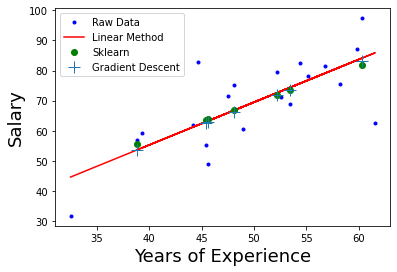

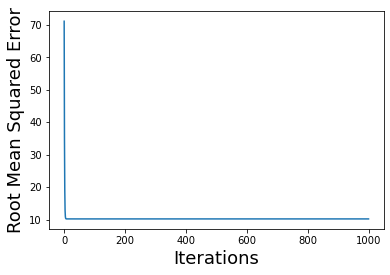

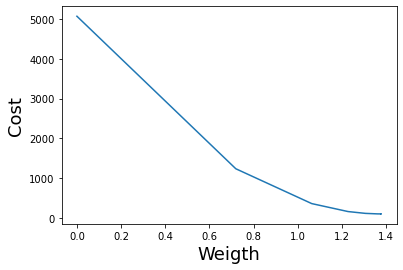

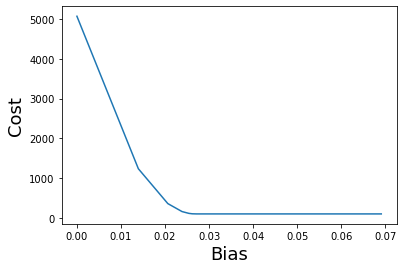

In [3]:
if __name__ == '__main__':
    #data
    df_expe = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
           55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
           45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
           48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    df_sala = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
           78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
           55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
           60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])
    df_expe_x = df_expe.reshape(-1, 1)
    df_sala_y = df_sala.reshape(-1, 1)
    
    yy                      = linear_regression()    
    y_prediction, beta                                 = yy.univariate_linear_regression(df_expe,df_sala)
    x_test, y_test, pred_lr, x_train, y_train          = yy.skleanrn_LR(df_expe_x,df_sala_y)
    weigth_estimate, bias_estimate, cost, weight, bias = yy.Gradient_descent(x_train, y_train, 0.0, 0.0, 1000, 0.0001)
    y_plot                                             = yy.visualization(df_expe,df_sala,y_prediction,x_test, y_test, pred_lr, weigth_estimate, bias_estimate, cost, weight, bias)
    root_mse, r2                                       = yy.score_skleanrn_LR(y_test, pred_lr)
    
    print("Root Mean Squared Error: ",root_mse," | R2 Score or Coefficient of determination: ",r2)
    print(beta)
    print(weigth_estimate,bias_estimate)

Root Mean Squared Error:  1.4255362154646082e-14  | R2 Score or Coefficient of determination:  1.0
[1.13686838e-13 2.00000000e+00]
1.9995407956222024 0.029563645861349585


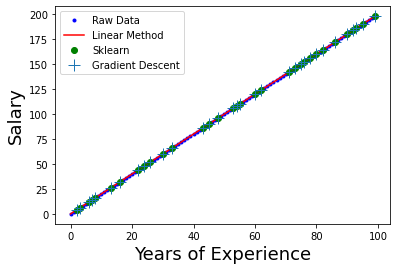

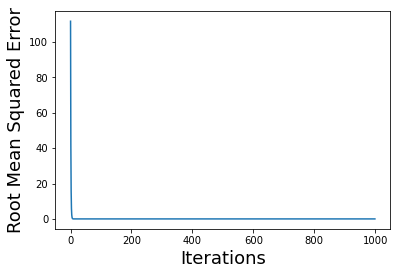

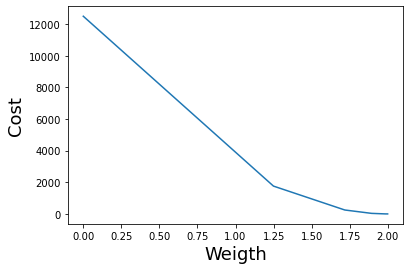

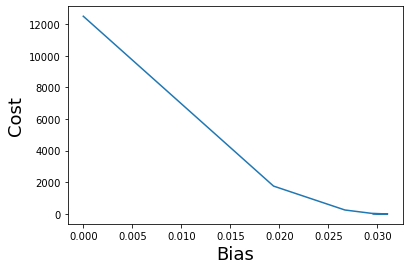

In [4]:
    #data
    df_expe = np.array([i for i in range(100)])
    df_sala = np.array([2*i  for i in range(100)])
    df_expe_x = df_expe.reshape(-1, 1)
    df_sala_y = df_sala.reshape(-1, 1)
    
    yy                      = linear_regression()    
    y_prediction, beta                                 = yy.univariate_linear_regression(df_expe,df_sala)
    x_test, y_test, pred_lr, x_train, y_train          = yy.skleanrn_LR(df_expe_x,df_sala_y)
    weigth_estimate, bias_estimate, cost, weight, bias = yy.Gradient_descent(x_train, y_train, 0.0, 0.0, 1000, 0.0001)
    y_plot                                             = yy.visualization(df_expe,df_sala,y_prediction,x_test, y_test, pred_lr, weigth_estimate, bias_estimate, cost, weight, bias)
    root_mse, r2                                       = yy.score_skleanrn_LR(y_test, pred_lr)
    
    print("Root Mean Squared Error: ",root_mse," | R2 Score or Coefficient of determination: ",r2)
    print(beta)
    print(weigth_estimate,bias_estimate)

Root Mean Squared Error:  1.5349477418661813e-14  | R2 Score or Coefficient of determination:  1.0
[30.  2.]
2.0033596038109955 29.78370820901341


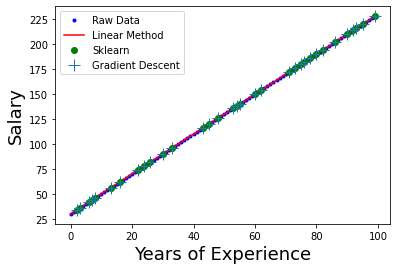

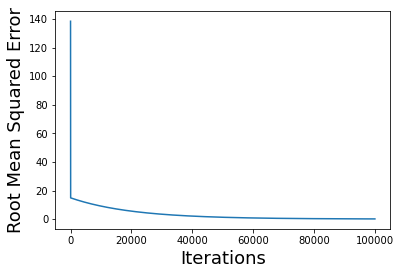

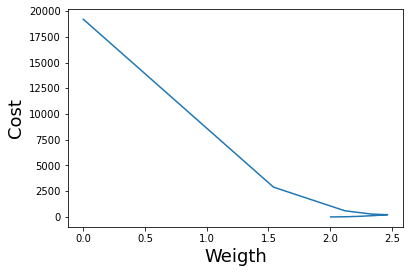

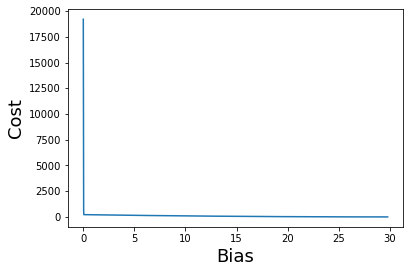

In [5]:
    #data
    df_expe = np.array([i for i in range(100)])
    df_sala = np.array([2*i + 30.0 for i in range(100)])
    df_expe_x = df_expe.reshape(-1, 1)
    df_sala_y = df_sala.reshape(-1, 1)
    
    yy                      = linear_regression()    
    y_prediction, beta                                 = yy.univariate_linear_regression(df_expe,df_sala)
    x_test, y_test, pred_lr, x_train, y_train          = yy.skleanrn_LR(df_expe_x,df_sala_y)
    weigth_estimate, bias_estimate, cost, weight, bias = yy.Gradient_descent(x_train, y_train, 0.0, 
                                                                             0.0, 100000, 0.0001)
    y_plot                                             = yy.visualization(df_expe,df_sala,y_prediction,x_test, y_test, pred_lr, weigth_estimate, bias_estimate, cost, weight, bias)
    root_mse, r2                                       = yy.score_skleanrn_LR(y_test, pred_lr)
    
    print("Root Mean Squared Error: ",root_mse," | R2 Score or Coefficient of determination: ",r2)
    print(beta)
    print(weigth_estimate,bias_estimate)

Root Mean Squared Error:  4585.4157204675885  | R2 Score or Coefficient of determination:  0.9749154407708353
[25792.20019867  9449.96232146]
9399.4147550481 26493.319470894847


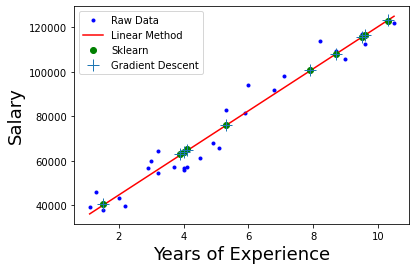

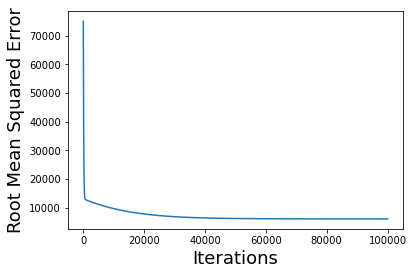

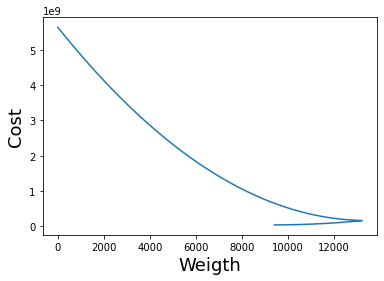

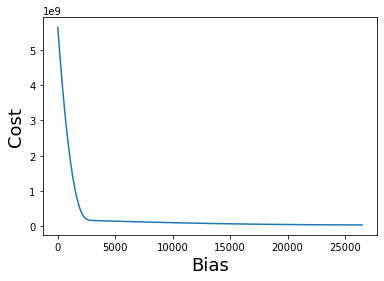

In [6]:
    #data
    df = pd.read_csv('Salary_Data.csv')
    df_expe = df['YearsExperience']
    df_sala = df['Salary']
    df_expe_x = df['YearsExperience'].values.reshape(-1, 1)
    df_sala_y = df['Salary'].values.reshape(-1, 1)
    
    yy                      = linear_regression()    
    y_prediction, beta                                 = yy.univariate_linear_regression(df_expe,df_sala)
    x_test, y_test, pred_lr, x_train, y_train          = yy.skleanrn_LR(df_expe_x,df_sala_y)
    weigth_estimate, bias_estimate, cost, weight, bias = yy.Gradient_descent(x_train, y_train, 0.0, 0.0, 100000, 0.0001)
    y_plot                                             = yy.visualization(df_expe,df_sala,y_prediction,x_test, y_test, pred_lr, weigth_estimate, bias_estimate, cost, weight, bias)
    root_mse, r2                                       = yy.score_skleanrn_LR(y_test, pred_lr)
    
    print("Root Mean Squared Error: ",root_mse," | R2 Score or Coefficient of determination: ",r2)
    print(beta)
    print(weigth_estimate,bias_estimate)